### Example: Eigenfaces

• Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see In-Depth: Support Vector Machines).

• Here we will take a look back and explore a bit more of what went into that. Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


• Let's take a look at the principal axes that span this dataset.

• Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).

• We will take a look at the first 150 components:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

• In this case, it can be interesting to visualize the images associated with the first several principal components(these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces").

• As you can see in this figure, they are as creepy as they sound:

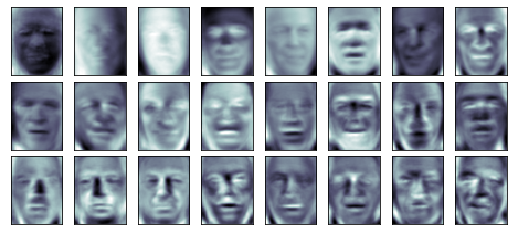

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

• The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.

• Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

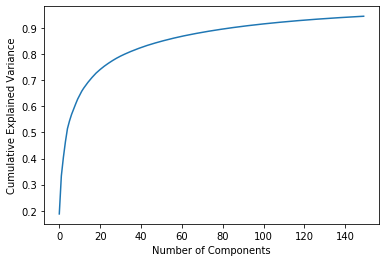

In [8]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

• We see that these 150 components account for just over 90% of the variance.

• That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

• To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [9]:
# Compute the components & projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

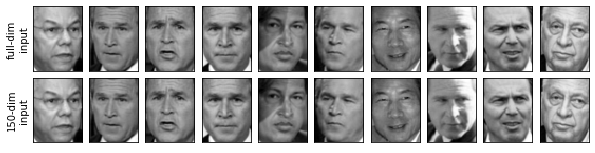

In [11]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                  subplot_kw={'xticks':[], 'yticks':[]},
                  gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\ninput');

• The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.

• This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.

• What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.